# Compare abrupt-4xCO2 with 2xCO2 and 0.5xCO2

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from scipy import optimize
from estimation import *

In [29]:
experiments = {}
directory = '../Processed_data/Global_annual_anomalies/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    for exp in modelexp_names:
        if exp in ['abrupt-2xCO2', 'abrupt-0p5xCO2']:
            experiments[model][exp] = find_members(model, exp)# members
    if bool(experiments[model]) == False: # delete element if empty
        del experiments[model]
experiments # prints all members of these exps
models = experiments.keys()


In [30]:
experiments

{'CESM2': {'abrupt-2xCO2': ['r1i1p1f1'], 'abrupt-0p5xCO2': ['r1i1p1f1']},
 'CNRM-CM6-1': {'abrupt-2xCO2': ['r1i1p1f2'], 'abrupt-0p5xCO2': ['r1i1p1f2']},
 'CanESM5': {'abrupt-2xCO2': ['r1i1p2f1'], 'abrupt-0p5xCO2': ['r1i1p2f1']},
 'GISS-E2-1-G': {'abrupt-2xCO2': ['r102i1p1f1',
   'r1i1p1f1',
   'r1i1p3f1',
   'r1i1p5f1'],
  'abrupt-0p5xCO2': ['r1i1p1f1']},
 'GISS-E2-1-H': {'abrupt-2xCO2': ['r1i1p1f1', 'r1i1p5f1']},
 'GISS-E2-2-G': {'abrupt-2xCO2': ['r1i1p1f1']},
 'GISS-E2-2-H': {'abrupt-2xCO2': ['r1i1p1f1']},
 'HadGEM3-GC31-LL': {'abrupt-2xCO2': ['r1i1p1f3'],
  'abrupt-0p5xCO2': ['r1i1p1f3']},
 'IPSL-CM6A-LR': {'abrupt-2xCO2': ['r1i1p1f1'],
  'abrupt-0p5xCO2': ['r1i1p1f1']},
 'MIROC6': {'abrupt-2xCO2': ['r1i1p1f1'], 'abrupt-0p5xCO2': ['r1i1p1f1']},
 'MRI-ESM2-0': {'abrupt-2xCO2': ['r1i1p1f1'], 'abrupt-0p5xCO2': ['r1i1p1f1']},
 'TaiESM1': {'abrupt-2xCO2': ['r1i1p1f1'], 'abrupt-0p5xCO2': ['r1i1p1f1']}}

In [31]:
models

dict_keys(['CESM2', 'CNRM-CM6-1', 'CanESM5', 'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-2-G', 'GISS-E2-2-H', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'TaiESM1'])

In [41]:
# Load other forcing estimates from Gregory regressions
erf_ratios_0p5x_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_0p5x.csv', index_col=0)
erf_ratios_4x_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_4x.csv', index_col=0)


In [42]:
erf_ratios_4x_df 

,5,10,20,30,Mean
CESM2,0.497924,0.543408,0.540948,0.545237,0.531879
CNRM-CM6-1,0.511743,0.496612,0.502293,0.543517,0.513541
CanESM5,0.480258,0.484929,0.487447,0.492388,0.486256
GISS-E2-1-G,0.494793,0.489364,0.482534,0.485679,0.488093
GISS-E2-1-H,0.488067,0.514708,0.494374,0.517138,0.503572
GISS-E2-2-G,0.530218,0.529147,0.555158,0.565820,0.545086
GISS-E2-2-H,0.480794,0.505827,0.490792,0.451877,0.482322
IPSL-CM6A-LR,0.638259,0.538598,0.516027,0.528128,0.555253
MIROC6,0.532366,0.440486,0.423334,0.446311,0.460624
MRI-ESM2-0,0.495043,0.485585,0.459035,0.470622,0.477571


In [34]:
f4x = etminan_co2forcing(4*284.3169998547858)
f2x = etminan_co2forcing(2*284.3169998547858)
f0p5x = etminan_co2forcing(0.5*284.3169998547858)
print('4xCO2 forcing =', f4x)
print('2xCO2 forcing =', f2x)
print('0.5xCO2 forcing =', f0p5x)

# Assuming ERF scales like Etminan RF, the ratios should be:

print('4x / 2x =', f4x/f2x )
print('2x / 4x =', f2x/f4x )
print('2x / 0.5x =', f2x/f0p5x )

4xCO2 forcing = 7.960357579130032
2xCO2 forcing = 3.8039731104119823
0.5xCO2 forcing = -3.743112284453599
4x / 2x = 2.092642967780574
2x / 4x = 0.4778646025129576
2x / 0.5x = -1.0162594176539024


In [35]:
# find T in year 150 to be used for sorting the models in the figure:
T_year150_abrupt2x = {}
exp = 'abrupt-2xCO2'
for (j, model) in enumerate(models):
    T_year150_abrupt2x[model] = []
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    if exp in modelexp_names:
        members = find_members(model, exp)
        for member in members:
            data = load_anom(model, exp, member, length_restriction = 150)
            deltaT0 = np.concatenate([[0],data['tas']])

            T_year150_abrupt2x[model].append(deltaT0[-1])
T_year150_abrupt2x_sorted = dict(reversed(sorted(T_year150_abrupt2x.items(), key=lambda item: item[1])))
T_year150_abrupt2x_sorted

{'HadGEM3-GC31-LL': [3.741572775344764],
 'TaiESM1': [3.675200949654993],
 'CanESM5': [3.3161052578213344],
 'CNRM-CM6-1': [3.2654127615942343],
 'IPSL-CM6A-LR': [3.192602078976733],
 'CESM2': [2.6310999059644478],
 'GISS-E2-1-H': [2.343418132445777, 2.3460583609767696],
 'GISS-E2-2-H': [2.271769667932631],
 'GISS-E2-1-G': [2.2217222555710805,
  2.137241238308434,
  2.235051409923301,
  2.2381289958786965],
 'GISS-E2-2-G': [2.0481299598654346],
 'MIROC6': [1.9737648761855555],
 'MRI-ESM2-0': [1.59875688109679]}

In [9]:
T_year150_abrupt2x_sorted.keys()

dict_keys(['HadGEM3-GC31-LL', 'TaiESM1', 'CanESM5', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'CESM2', 'GISS-E2-1-H', 'GISS-E2-2-H', 'GISS-E2-1-G', 'GISS-E2-2-G', 'MIROC6', 'MRI-ESM2-0'])

# Estimate temperature ratios to be used to scale the other experiments to abrupt-2xCO2:

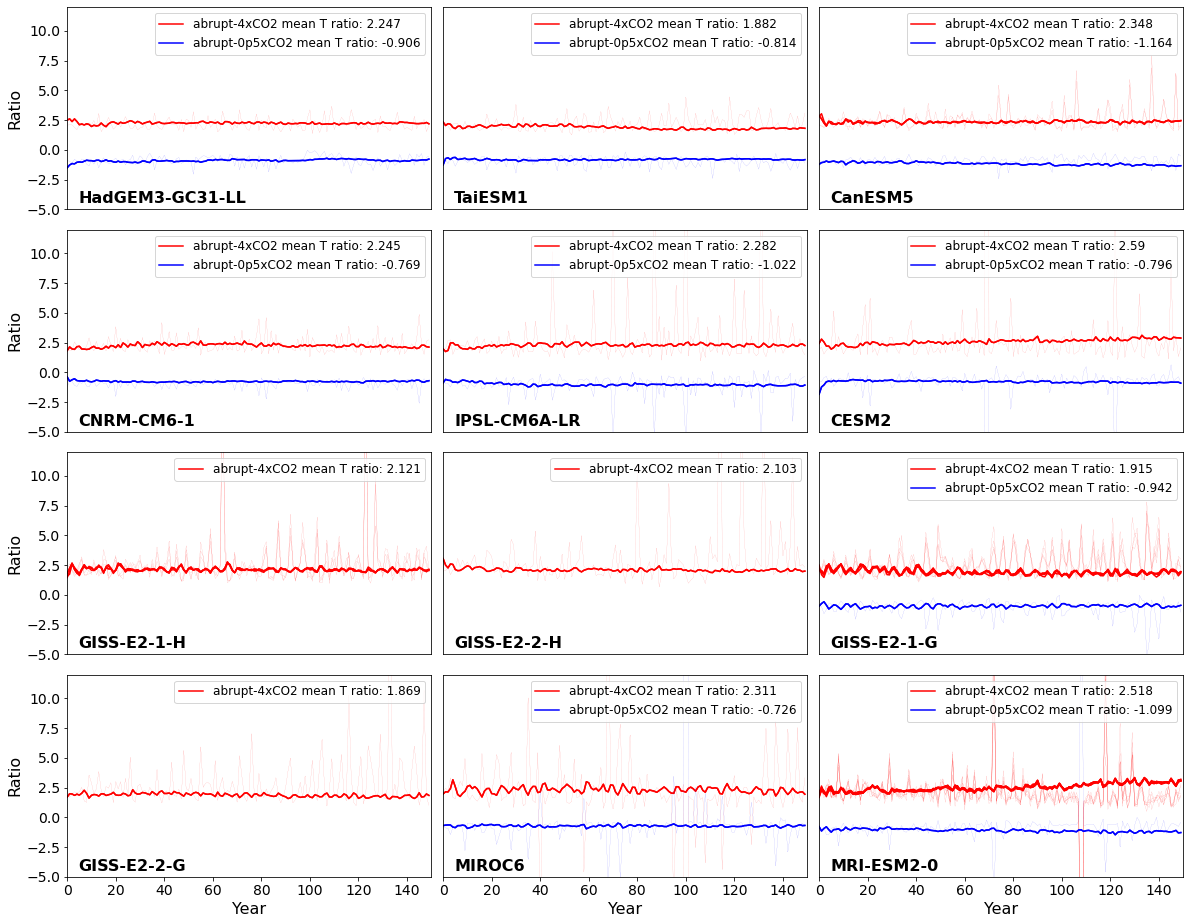

In [36]:
# Plot ratios to 2xCO2:

fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20,16))
axes = np.concatenate(axes)

mean_T_ratios = {}

#for (j, model) in enumerate(models):
for (j, model) in enumerate(T_year150_abrupt2x_sorted.keys()):
    mean_T_ratios[model] = {}
    ax = axes[j]
    # define x-label:
    if j in [9, 10, 11]:
        ax.set_xlabel('Year', fontsize = 16)
    else: 
        ax.axes.xaxis.set_visible(False)
    if j in [0, 3, 6, 9]:
        ax.set_ylabel('Ratio', fontsize = 16)
    else:
        ax.axes.yaxis.set_visible(False)
    ax.tick_params(axis='both', labelsize = 14)
    ax.text(0.03, 0.03, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.set_xlim(0,150)
        
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    for (k, exp) in enumerate(['abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-0p5xCO2']):
        if exp in modelexp_names:
            members = find_members(model, exp)
            if exp == 'abrupt-4xCO2' and model == 'GISS-E2-1-G':
                members.remove('r1i1p1f3')
            if exp in ['abrupt-4xCO2', 'abrupt-0p5xCO2']:
                mean_T_ratios[model][exp] = {}
            for (m, member) in enumerate(members):
                data = load_anom(model, exp, member, length_restriction = 150)
                deltaT = data['tas'].values
                
                toarad = data['rsdt'].values - data['rsut'].values - data['rlut'].values
                
                if exp == 'abrupt-4xCO2':
                    color = 'red'
                elif exp == 'abrupt-0p5xCO2':
                    color = 'blue'

                if exp == 'abrupt-2xCO2':
                    tas_2x = deltaT
                    toarad_2x = toarad
                else:
                    if len(data)>100:
                        T_ratio = deltaT/tas_2x
                        N_ratio = toarad/toarad_2x
                        mean_T_ratio = np.nanmean(T_ratio)

                        ax.plot(T_ratio, color = color)
                        if mean_T_ratios[model][exp] == {}:
                            mean_T_ratios[model][exp] = [mean_T_ratio]
                        else:
                            mean_T_ratios[model][exp].append(mean_T_ratio)
                        ax.plot(N_ratio, '--', color = color, linewidth = 0.1)
            if exp in ['abrupt-4xCO2', 'abrupt-0p5xCO2']:
                ax.plot(T_ratio, color = color, label = exp + ' mean T ratio: ' + str(np.round(np.mean(mean_T_ratios[model][exp]),3)))
                
            
    ax.legend(fontsize = 12, loc = 'upper right')
    ax.set_ylim(-5,12)
plt.subplots_adjust(hspace=0.1, wspace = 0.0325)
#plt.savefig('../Figures/abruptCO2exp_TandN_ratios_CMIP6.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [37]:
mean_T_ratios

{'HadGEM3-GC31-LL': {'abrupt-4xCO2': [2.2467397272378964],
  'abrupt-0p5xCO2': [-0.9061586124545431]},
 'TaiESM1': {'abrupt-4xCO2': [1.882292127327646],
  'abrupt-0p5xCO2': [-0.8143156586219262]},
 'CanESM5': {'abrupt-4xCO2': [2.349970858520088, 2.345681832957907],
  'abrupt-0p5xCO2': [-1.163706266366721]},
 'CNRM-CM6-1': {'abrupt-4xCO2': [2.2451532245506085],
  'abrupt-0p5xCO2': [-0.7685112671174253]},
 'IPSL-CM6A-LR': {'abrupt-4xCO2': [2.2815199068433505],
  'abrupt-0p5xCO2': [-1.0219872886109924]},
 'CESM2': {'abrupt-4xCO2': [2.5895553386910755],
  'abrupt-0p5xCO2': [-0.7961920850851443]},
 'GISS-E2-1-H': {'abrupt-4xCO2': [2.131614542973218,
   2.1112864723381146,
   2.119310663756433]},
 'GISS-E2-2-H': {'abrupt-4xCO2': [2.1026748445393357]},
 'GISS-E2-1-G': {'abrupt-4xCO2': [1.9371914762270679,
   1.9468006988110482,
   1.85220882205301,
   1.923813772786276],
  'abrupt-0p5xCO2': [-0.9422805449628487]},
 'GISS-E2-2-G': {'abrupt-4xCO2': [1.8691736909600862]},
 'MIROC6': {'abrupt-4xC

HadGEM3-GC31-LL
TaiESM1
CanESM5
CNRM-CM6-1
IPSL-CM6A-LR
CESM2
GISS-E2-1-H
GISS-E2-2-H
GISS-E2-1-G
GISS-E2-2-G
MIROC6
MRI-ESM2-0


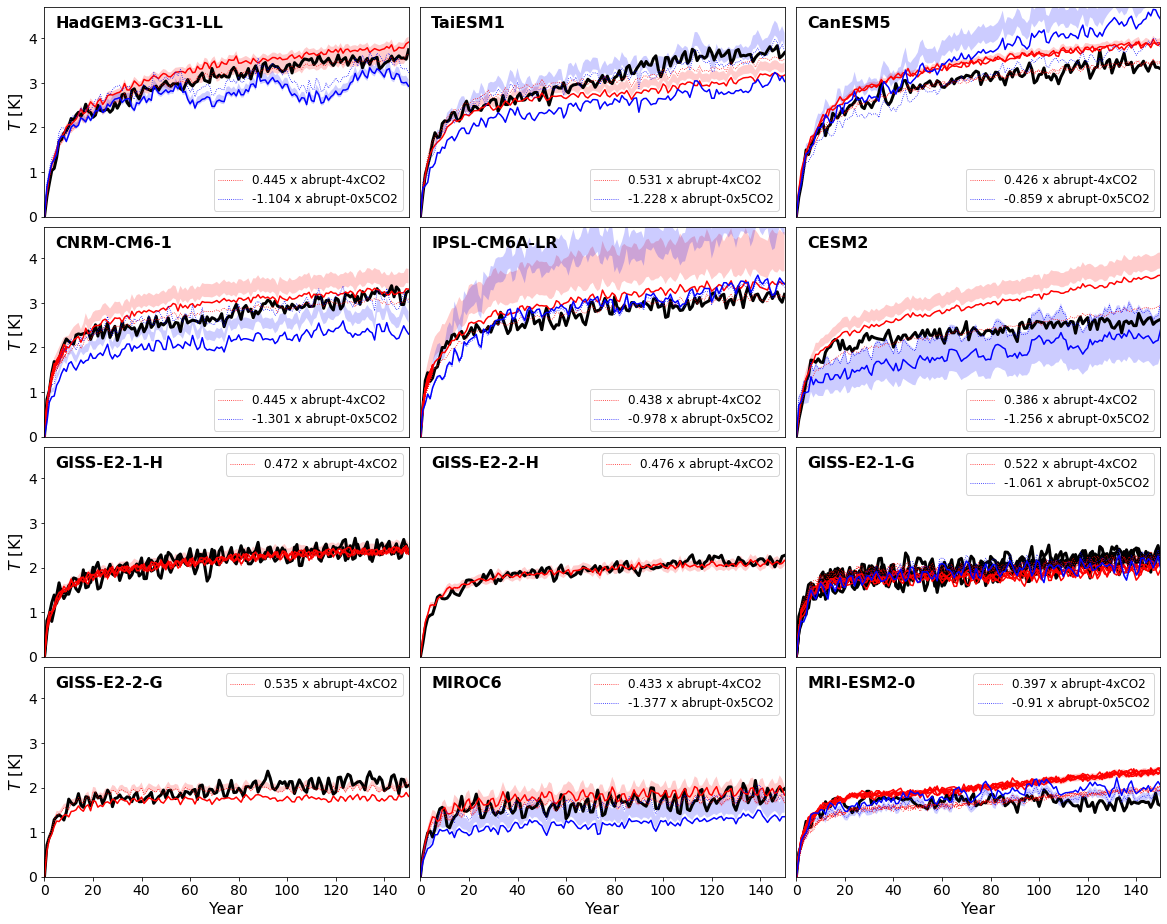

In [51]:

fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20,16))
axes = np.concatenate(axes)
years0 = np.arange(0,150+1)
npanels = len(models)
colors = ['black', 'red', 'blue']
lw = 0.8

for (j, model) in enumerate(T_year150_abrupt2x_sorted.keys()):
    print(model)
    ax = axes[j]
    # define x-label:
    if j in [9, 10, 11]:
        ax.set_xlabel('Year', fontsize = 16)
    else: 
        ax.axes.xaxis.set_visible(False)
    if j in [0, 3, 6, 9]:
        ax.set_ylabel('$T$ [K]', fontsize = 16)
    else:
        ax.axes.yaxis.set_visible(False)

    ax.tick_params(axis='both', labelsize = 14)
    #ax.set_title(model, fontweight = 'bold')
    #ax.text(5, 4.2, model, fontweight = 'bold')
    ax.text(0.03, 0.9, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.set_xlim(0,150)
    ax.set_ylim(0,4.7);
    
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    for (k, exp) in enumerate(['abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-0p5xCO2']):
        if exp in modelexp_names:
            members = find_members(model, exp)
            if exp == 'abrupt-4xCO2' and model == 'GISS-E2-1-G':
                members.remove('r1i1p1f3')
            member_meanT0 = member_mean_tas(model, members, length_restriction = 150, exp = exp)
            
            for (m, member) in enumerate(members):
                data = load_anom(model, exp, member, length_restriction = 150)
                deltaT0 = np.concatenate([[0],data['tas']])
                
                # Plot abrupt-2xCO2
                if exp == 'abrupt-2xCO2':
                    ax.plot(years0[:len(deltaT0)], deltaT0, color = colors[k], linewidth = 3)
                    continue
                
                ##### Plotting with different forcing ratios #####
                
                # ratios based on either nonlogarithmic or logarithmic forcing:
                if exp == 'abrupt-4xCO2':
                    forcingratio = f2x/f4x
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = -1
                ax.plot(years0[:len(deltaT0)], deltaT0*forcingratio, color = colors[k])
                
                # forcing ratios from Gregory regressions
                if exp == 'abrupt-4xCO2':
                    forcingratio_df = erf_ratios_4x_df.loc[model]
                    forcingratio = forcingratio_df['Mean']
                    label = str(np.round(forcingratio,3)) + ' x abrupt-4xCO2'
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio_df = erf_ratios_0p5x_df.loc[model]
                    forcingratio = forcingratio_df['Mean']
                    label = str(np.round(forcingratio,3)) + ' x abrupt-0x5CO2'
                minratio = forcingratio_df['5':'30'].min()
                maxratio = forcingratio_df['5':'30'].max()
                if m == 0:
                    ax.fill_between(years0[:len(member_meanT0)], member_meanT0*minratio, member_meanT0*maxratio, color = colors[k], alpha = 0.2, edgecolor = None)
                    
                # forcing ratios derived from temperature ratios:
                if exp == 'abrupt-4xCO2':
                    forcingratio = 1/np.mean(mean_T_ratios[model][exp])
                    label = str(np.round(forcingratio,3)) + ' x abrupt-4xCO2'
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = 1/np.mean(mean_T_ratios[model][exp])
                    label = str(np.round(forcingratio,3)) + ' x abrupt-0x5CO2'
                if m == 0:
                    ax.plot(years0[:len(deltaT0)], deltaT0*forcingratio, ':', color = colors[k], label = label, linewidth = lw)
                else:
                    ax.plot(years0[:len(deltaT0)], deltaT0*forcingratio, ':', color = colors[k], linewidth = lw)
    if j<6:
        ax.legend(loc = 'lower right', fontsize = 12)
    else:
        ax.legend(loc = 'upper right', fontsize = 12)            
plt.subplots_adjust(hspace=0.05, wspace = 0.0325)

#plt.savefig('../Figures/abruptCO2exp_CMIP6_gregregshading.pdf', format='pdf', dpi=600, bbox_inches="tight")
    

In [47]:
erf_ratios_4x_df.loc[model]

5       0.432553
10      0.476116
20      0.479958
30      0.492805
Mean    0.470358
Name: HadGEM3-GC31-LL, dtype: float64

## N vs T

In [25]:
colors

['black', 'red', 'blue']

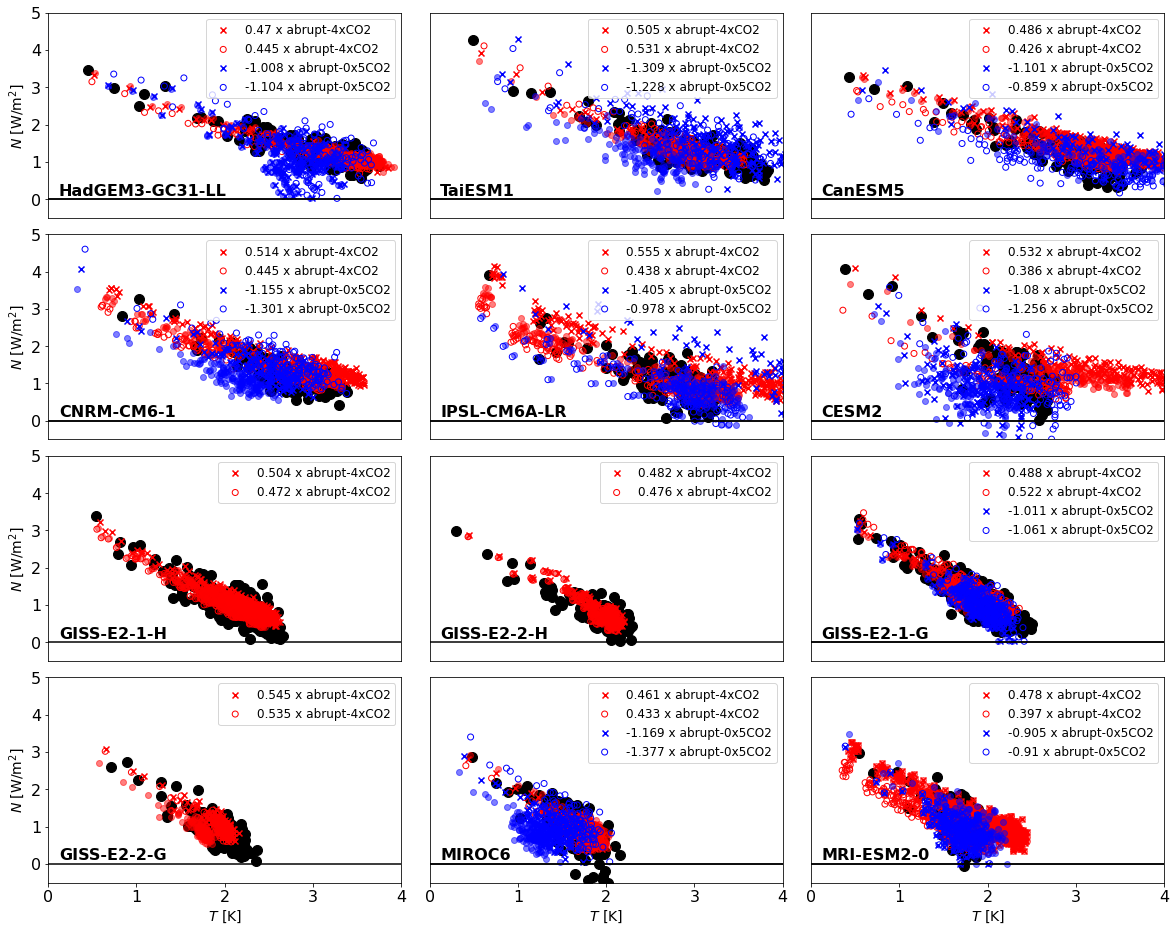

In [27]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20,16))
axes = np.concatenate(axes)

#for (j, model) in enumerate(models):
for (j, model) in enumerate(T_year150_abrupt2x_sorted.keys()):
    ax = axes[j]
    ax.text(0.03, 0.11, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    ax.set_xlim(0,4)
    ax.set_ylim(-0.5,5);
    
    # define x-label:
    if j in [9, 10, 11]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    else: 
        ax.axes.xaxis.set_visible(False)
    if j in [0, 3, 6, 9]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)
        
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    for (k, exp) in enumerate(['abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-0p5xCO2']):
        if exp in modelexp_names:
            members = find_members(model, exp)
            if exp == 'abrupt-4xCO2' and model == 'GISS-E2-1-G':
                members.remove('r1i1p1f3')
                
            for (m, member) in enumerate(members):
                data = load_anom(model, exp, member, length_restriction = 150)
                deltaT = data['tas'].values
                N = data['rsdt'].values - data['rsut'].values - data['rlut'].values
                
                # Plot abrupt-2xCO2
                if exp == 'abrupt-2xCO2':
                    ax.scatter(deltaT, N, c = colors[k], s = 100)
                    continue
                
                ##### Plotting with different forcing ratios #####
                
                # ratios based on either nonlogarithmic or logarithmic forcing:
                if exp == 'abrupt-4xCO2':
                    forcingratio = f2x/f4x
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = -1
                ax.scatter(deltaT*forcingratio, N*forcingratio, c = colors[k], alpha = 0.5)
                
                # forcing ratios from Gregory regressions:
                if exp == 'abrupt-4xCO2':
                    forcingratio = erf_ratios_4x_df[model]
                    label = str(np.round(forcingratio,3)) + ' x abrupt-4xCO2'
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = erf_ratios_0p5x_df[model]
                    label = str(np.round(forcingratio,3)) + ' x abrupt-0x5CO2'
                if m == 0:
                    ax.scatter(deltaT*forcingratio, N*forcingratio, marker = 'x', c = colors[k], label = label)
                else:
                    ax.scatter(deltaT*forcingratio, N*forcingratio, marker = 'x', c = colors[k])
                    
                # forcing ratios derived from temperature ratios:
                if exp == 'abrupt-4xCO2':
                    forcingratio = 1/np.mean(mean_T_ratios[model][exp])
                    label = str(np.round(forcingratio,3)) + ' x abrupt-4xCO2'
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = 1/np.mean(mean_T_ratios[model][exp])
                    label = str(np.round(forcingratio,3)) + ' x abrupt-0x5CO2'
                if m == 0:
                    ax.scatter(deltaT*forcingratio, N*forcingratio, facecolors='none', edgecolor = colors[k], label = label)
                    ax.axhline(y=0, color = 'black')
                else:
                    ax.scatter(deltaT*forcingratio, N*forcingratio, facecolors='none', edgecolor = colors[k])
    
    ax.legend(loc = 'upper right', fontsize = 12)            
plt.subplots_adjust(hspace=0.08, wspace = 0.08)

#plt.savefig('../Figures/abruptCO2exp_NvsT_CMIP6_gregreg.pdf', format='pdf', dpi=600, bbox_inches="tight")


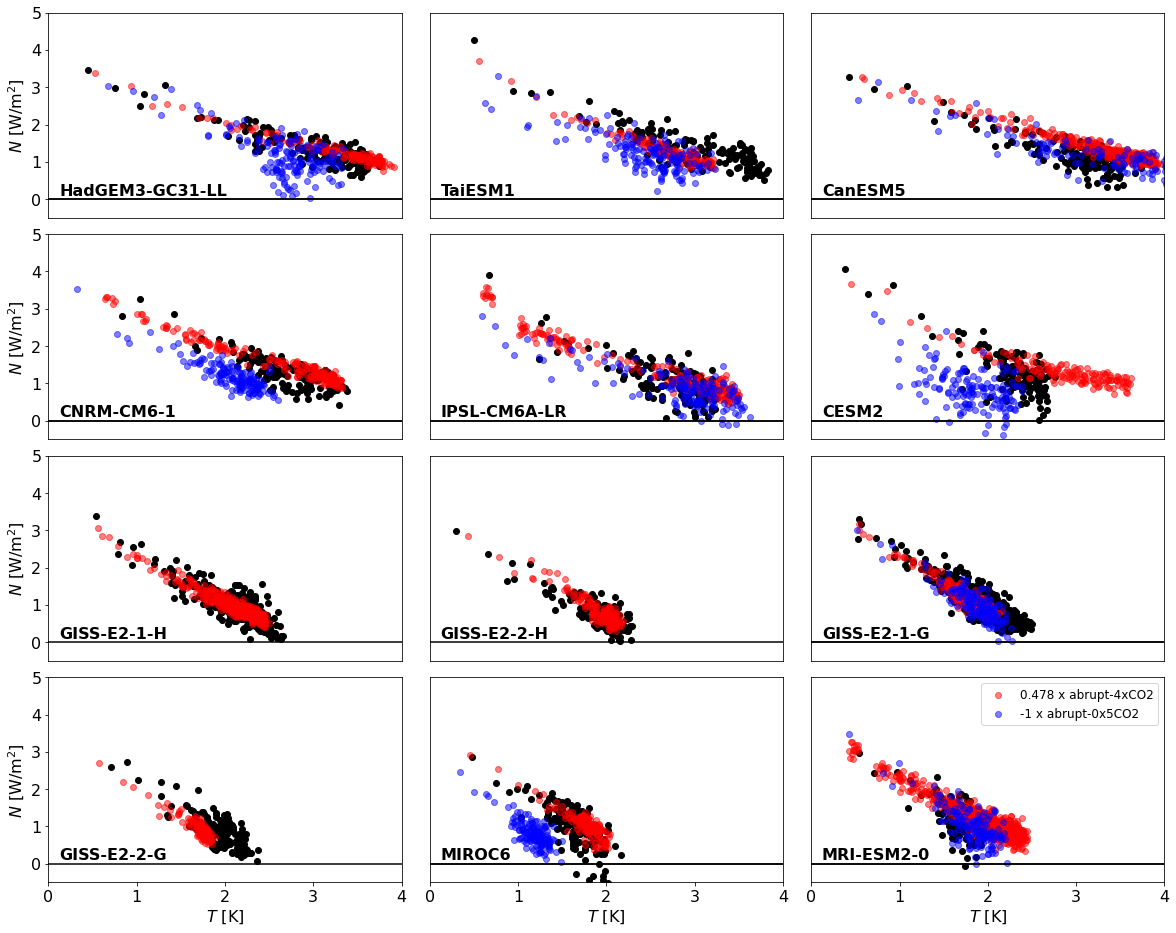

In [82]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20,16))
axes = np.concatenate(axes)

#for (j, model) in enumerate(models):
for (j, model) in enumerate(T_year150_abrupt2x_sorted.keys()):
    ax = axes[j]
    ax.text(0.03, 0.11, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    ax.set_xlim(0,4)
    ax.set_ylim(-0.5,5);
    
    # define x-label:
    if j in [9, 10, 11]:
        ax.set_xlabel('$T$ [K]', fontsize = 16)
    else: 
        ax.axes.xaxis.set_visible(False)
    if j in [0, 3, 6, 9]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 16)
    else:
        ax.axes.yaxis.set_visible(False)
        
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    for (k, exp) in enumerate(['abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-0p5xCO2']):
        if exp in modelexp_names:
            members = find_members(model, exp)
            if exp == 'abrupt-4xCO2' and model == 'GISS-E2-1-G':
                members.remove('r1i1p1f3')
                
            for (m, member) in enumerate(members):
                data = load_anom(model, exp, member, length_restriction = 150)
                deltaT = data['tas'].values
                N = data['rsdt'].values - data['rsut'].values - data['rlut'].values
                
                if exp == 'abrupt-2xCO2':
                    ax.scatter(deltaT, N, color = colors[k])
                    continue
                    
                if exp == 'abrupt-4xCO2':
                    forcingratio = f2x/f4x
                    label = str(np.round(forcingratio,3)) + ' x abrupt-4xCO2'
                elif exp == 'abrupt-0p5xCO2':
                    forcingratio = -1
                    label = str(np.round(forcingratio,3)) + ' x abrupt-0x5CO2'

                if m == 0:
                    if j == 11:
                        ax.scatter(deltaT*forcingratio, N*forcingratio, color = colors[k], label = label, alpha = 0.5)
                    else:
                        ax.scatter(deltaT*forcingratio, N*forcingratio, color = colors[k], alpha = 0.5)
                    ax.axhline(y=0, color = 'black')
                else:
                    ax.scatter(deltaT*forcingratio, N*forcingratio, color = colors[k], alpha = 0.5)
    
    if j == 11:
        ax.legend(loc = 'upper right', fontsize = 12)            
plt.subplots_adjust(hspace=0.08, wspace = 0.08)

#plt.savefig('../Figures/abruptCO2exp_NvsT_CMIP6.pdf', format='pdf', dpi=600, bbox_inches="tight")
